# Initial Data Exploration  
The purpose of our initial data exploration is to:
<ol type = "a">
    <li>Check the validity of the data and perform data cleaning methods if needed.</li>
    <li>View the statistical details of the data and perform data visualization to improve our understanding of the data</li>
    <li>Initiate new hypotheses on both the future clustering and evaluation method.</li>
    <li>Validate assumptions of any clustering methods we intend to use & perform transformations if needed.</li>
    <li>Measure clustering & central tendency.</li>
</ol>

If you are viewing this as an HTML page, please use the content toolbar to the right for quick access to different sections.

## Importing required libraries 
Data processing

In [1]:
import pandas as pd

Data Visualization 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

For the purposes of this exploration, we load in 12 different csv files. 
|    Type     | File Name |    Description      |
| :------------ | -------------: | :------------ |
|        Choices     |        choices_95.csv, choices_100.csv, choices_150.csv     | These CSV's contains all of the choices made by test-takers during the examined studies. **Note**, the 10 studies described in the Introduction section are grouped by the number of trails. The integer suffix of the file name indicates the number of trails performed. For example, the 1<sup>st</sup> row and 2<sup>nd</sup> column instance of the choices_95.csv file describes a participant's 2<sup>nd</sup> card choice in a 95 trail study.   |    
|     Wins     |      wi_95.csv, wi_100.csv, wi_150.csv      |     These datasets describe the wins received by participants in 95, 100 and 150 trail investigations, as indicated by the suffix. For example, the  3<sup>rd</sup> row and 5<sup>th</sup> column entry of the wi_100.csv file details the monetary gain received by a participant on their 5<sup>th</sup> choice in 100 trail study.     | 
|        Losses    |        lo_95.csv, lo_100.csv, lo_150.csv     |   These files contain the loses received by participants in 95, 100 and 150 trail investigations, as indicated by the suffix. For example, the  2<sup>nd</sup> row and 8<sup>th</sup> column entry of the lo_150.csv file details the monetary penalty received by a participant on their 8<sup>th</sup> choice in 150 trail study.      |        
|     Index     |      index_95.csv, index_100.csv, index_150.csv    | index_95.csv, index_100.csv, and index_150.csv map the first author of the study that reports the data to the corresponding subject. |      

In [3]:
choice_95 = pd.read_csv('data/choice_95.csv')
choice_100 = pd.read_csv('data/choice_100.csv')
choice_150 = pd.read_csv('data/choice_150.csv')

In [4]:
win_95 = pd.read_csv('data/wi_95.csv')
win_100 = pd.read_csv('data/wi_100.csv')
win_150 = pd.read_csv('data/wi_150.csv')

In [5]:
loss_95 = pd.read_csv('data/lo_95.csv')
loss_100 = pd.read_csv('data/lo_100.csv')
loss_150 = pd.read_csv('data/lo_150.csv')

In [6]:
index_95 = pd.read_csv('data/index_95.csv')
index_100 = pd.read_csv('data/index_100.csv')
index_150 = pd.read_csv('data/index_150.csv')

Currently, the dataframes have columns in the following name format: `<Description>_<Trial number>` as indicated down below.

In [7]:
print(f'Win dataframes have the following name format: {", ".join(list(win_100.columns[:3]))}')
print(f'Loss dataframes have the following name format: {", ".join(list(loss_100.columns[:3]))}')
print(f'Choice dataframes have the following name format: {", ".join(list(choice_100.columns[:3]))}')

Win dataframes have the following name format: Wins_1, Wins_2, Wins_3
Loss dataframes have the following name format: Losses_1, Losses_2, Losses_3
Choice dataframes have the following name format: Choice_1, Choice_2, Choice_3


For uniformity, we will replace the column names to have a `Trial_<Trial number>` format as the variable names already indicates functionality. 

In [8]:
column_names = [f'trial_{num}' for num in range(1,96)]
choice_95.columns = win_95.columns = loss_95.columns = column_names

column_names.extend([f'trial_{num}' for num in range(96,101)])
choice_100.columns = win_100.columns = loss_100.columns = column_names

column_names.extend([f'trial_{num}' for num in range(101,151)])
choice_150.columns = win_150.columns = loss_150.columns = column_names

win_95.head(5)

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10,...,trial_86,trial_87,trial_88,trial_89,trial_90,trial_91,trial_92,trial_93,trial_94,trial_95
Subj_1,100,100,100,100,100,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,50,100,100,100,100,100,50,50,50,50
Subj_3,50,50,50,100,100,100,100,100,100,100,...,100,100,100,50,50,50,50,50,50,50
Subj_4,50,50,100,100,100,100,100,50,100,100,...,100,50,50,50,50,50,50,50,50,50
Subj_5,100,100,50,50,50,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50


## Data Cleaning  
Check for null values

In [9]:
print(f'Does choice_95 contain any null values? {choice_95.isnull().any().any()}')
print(f'Does choice_100 contain any null values? {choice_100.isnull().any().any()}')
print(f'Does choice_150 contain any null values? {choice_150.isnull().any().any()}')

Does choice_95 contain any null values? False
Does choice_100 contain any null values? False
Does choice_150 contain any null values? False


In [10]:
print(f'Does win_95 contain any null values? {win_95.isnull().any().any()}')
print(f'Does win_100 contain any null values? {win_100.isnull().any().any()}')
print(f'Does win_150 contain any null values? {win_150.isnull().any().any()}')

Does win_95 contain any null values? False
Does win_100 contain any null values? False
Does win_150 contain any null values? False


In [11]:
print(f'Does choice_95 contain any null values? {loss_95.isnull().any().any()}')
print(f'Does choice_100 contain any null values? {loss_100.isnull().any().any()}')
print(f'Does choice_150 contain any null values? {loss_150.isnull().any().any()}')

Does choice_95 contain any null values? False
Does choice_100 contain any null values? False
Does choice_150 contain any null values? False


In [12]:
print(f'Does index_95 contain any null values? {index_95.isnull().values.any()}')
print(f'Does index_100 contain any null values? {index_100.isnull().values.any()}')
print(f'Does index_150 contain any null values? {index_150.isnull().values.any()}')

Does index_95 contain any null values? False
Does index_100 contain any null values? False
Does index_150 contain any null values? False


This finding seems to contradict the original 'many labs' paper. They suggest that their should be missing data present in the 100 trial dataframes due to incompletely received datasets (i.e., missing data for one participant in
Kjome et al. study, and for two participants in Wood et al. study). However, they use the word 'might' so it is possible this has been rectified since then. I also further validated this assumption using the R programming language as the organizers provided the datasets in the rdata format. The below screenshot confirms my assumption that no missing values are present.

![absence-of-missing-values-verified-in-r](images/missing_values_verified_in_r.png)


Next, we calculate the basic statistics of each data set. This is a trivial step and it is designed to increase my understanding of the problem.

In [13]:
# choice dataframes
for trial_num in [95, 100, 150]:
    print(f'choice_{trial_num} basic statistics')
    print(globals()[f'choice_{trial_num}'].describe().iloc[:,:6])
    print('\n')

choice_95 basic statistics
         trial_1    trial_2    trial_3    trial_4    trial_5    trial_6
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000
mean    2.133333   2.333333   2.466667   2.600000   2.533333   2.133333
std     1.355764   0.816497   1.060099   1.183216   1.125463   0.990430
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000
25%     1.000000   2.000000   1.500000   2.000000   2.000000   1.500000
50%     1.000000   2.000000   3.000000   2.000000   2.000000   2.000000
75%     3.500000   2.500000   3.000000   4.000000   3.500000   2.500000
max     4.000000   4.000000   4.000000   4.000000   4.000000   4.000000


choice_100 basic statistics


          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000
mean     2.142857    2.416667    2.337302    2.434524    2.281746    2.337302
std      1.099172    1.092628    1.090952    1.138377    1.095801    1.044401
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.000000
50%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000
75%      3.000000    3.000000    3.000000    4.000000    3.000000    3.000000
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000


choice_150 basic statistics


         trial_1    trial_2    trial_3    trial_4    trial_5    trial_6
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000
mean    2.795918   2.663265   2.469388   2.561224   2.500000   2.346939
std     1.044960   1.083559   1.168346   1.175930   1.159897   1.103902
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000
25%     2.000000   2.000000   1.000000   1.250000   1.250000   1.000000
50%     3.000000   3.000000   2.000000   3.000000   2.000000   2.000000
75%     4.000000   4.000000   4.000000   4.000000   4.000000   3.000000
max     4.000000   4.000000   4.000000   4.000000   4.000000   4.000000




In [14]:
# win dataframes
for trial_num in [95, 100, 150]:
    print(f'win_{trial_num} basic statistics')
    print(globals()[f'win_{trial_num}'].describe().iloc[:,:6])
    print('\n')

win_95 basic statistics


          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count   15.000000   15.000000   15.000000   15.000000   15.000000   15.000000
mean    80.000000   86.666667   70.000000   76.666667   76.666667   86.666667
std     25.354628   22.886885   25.354628   25.819889   25.819889   22.886885
min     50.000000   50.000000   50.000000   50.000000   50.000000   50.000000
25%     50.000000   75.000000   50.000000   50.000000   50.000000   75.000000
50%    100.000000  100.000000   50.000000  100.000000  100.000000  100.000000
75%    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000


win_100 basic statistics
          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000
mean    81.646825   77.956349   76.636905   77.172619   81.369048   80.724206
std     24.124146   26.566060   25.10

          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
mean    68.877551   72.959184   75.510204   74.489796   76.530612   79.591837
std     24.363343   25.044669   25.123302   25.123302   25.081395   24.701032
min     50.000000   50.000000   50.000000   50.000000   50.000000   50.000000
25%     50.000000   50.000000   50.000000   50.000000   50.000000   50.000000
50%     50.000000   50.000000  100.000000   50.000000  100.000000  100.000000
75%    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000




In [15]:
# loss dataframes
for trial_num in [95, 100, 150]:
    print(f'loss_{trial_num} basic statistics')
    print(globals()[f'loss_{trial_num}'].describe().iloc[:,:6])
    print('\n')

loss_95 basic statistics
       trial_1  trial_2    trial_3  trial_4     trial_5  trial_6
count     15.0     15.0  15.000000     15.0   15.000000     15.0
mean       0.0      0.0  -3.333333      0.0  -20.000000      0.0
std        0.0      0.0  12.909944      0.0   52.779866      0.0
min        0.0      0.0 -50.000000      0.0 -150.000000      0.0
25%        0.0      0.0   0.000000      0.0    0.000000      0.0
50%        0.0      0.0   0.000000      0.0    0.000000      0.0
75%        0.0      0.0   0.000000      0.0    0.000000      0.0
max        0.0      0.0   0.000000      0.0    0.000000      0.0


loss_100 basic statistics
           trial_1      trial_2      trial_3      trial_4      trial_5  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean    -37.301587   -40.376984   -64.682540   -39.384921   -49.107143   
std     149.610031   175.942949   192.871723   152.257429   157.402488   
min   -1250.000000 -1250.000000 -1250.000000 -1250.000000 -1250.00

          trial_1      trial_2      trial_3      trial_4      trial_5  \
count   98.000000    98.000000    98.000000    98.000000    98.000000   
mean   -33.673469   -64.795918   -81.122449   -88.775510  -120.918367   
std     75.905364   191.872109   227.323661   255.509458   302.218896   
min   -350.000000 -1250.000000 -1250.000000 -1250.000000 -1250.000000   
25%    -50.000000   -50.000000   -50.000000   -50.000000   -50.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      0.000000     0.000000     0.000000     0.000000     0.000000   

           trial_6  
count    98.000000  
mean   -109.183673  
std     282.692042  
min   -1250.000000  
25%     -50.000000  
50%       0.000000  
75%       0.000000  
max       0.000000  




Cumulative reward is commonly used to evaluate reinforcement learning models (RLM). This metric stems form the idea on how humans learn through interaction. RLMs attempt to be a computational approach of the same mechanism:
- A agent receives state $S_{0}$ from the environment (In this case, the agent received the four decks of cards, "untouched").
- Based on the $S_{0}$, the agent takes an action $A_{0}$  (our agent will pick a card from deck A, B, C, or D).
- Environment transitions to a new state $S_{1}$ (our agent is present with the same deck of cards, albeit their first choice absent).
- Environment  gives some reward $R_{1}$ to the agent.

Therefore, Cumulative reward at trial t can be defined as:
$$
G(t) = \sum_{k=0}^T R_{t+k+1}
$$

We  attempt to plot the calmative reward for the participants surveyed. However, given the large number of participants available, it is infeasible to plot for every subject. Therefore, we will group participants by study. So, the G(t) for a study will be cacluated as follows:

$$
G(t) = \sum_{i=0}^n\sum_{i=0}^n i^2 
$$

The next few code cells perform the data processing steps required to produce the visualisations. Asserts are used to test that the transformation has been performed correctly. 

In [16]:
# 95 Trial studies
# Getting the reward (positive or negative) for each subject
rewards_95 = win_95.add(loss_95)
assert rewards_95.iloc[1,2] == 50
assert rewards_95.iloc[13,7] == 100

# Acquiring the cumaltive reward for each particpant
cum_reward_95 = rewards_95.cumsum(axis=1)
assert cum_reward_95.iloc[0,8] == -350
assert cum_reward_95.iloc[11, 6] ==  500
assert cum_reward_95.iloc[8,67] == -450

# Acquiring the sum of cumulative rewards for each trial 
cum_reward_95 = cum_reward_95.sum(axis=0)
assert cum_reward_95['trial_1'] == 1200
assert cum_reward_95['trial_5'] == 5500
assert cum_reward_95['trial_91'] == -650
assert cum_reward_95['trial_95'] == 1250

# All 15 particpants in a 95 trial came from same study
cum_reward_95_mapped =pd.DataFrame(index=index_95['Study'].unique().tolist(), data=cum_reward_95.to_dict())
cum_reward_95_mapped.iloc[:,:10]

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10
Fridberg,1200,2500,3500,4650,5500,6800,7650,8800,8550,9550


In [17]:
# 100 Trial studies
# Getting the reward (positive or negative) for each subject
rewards_100 = win_100.add(loss_100)
assert rewards_100.iloc[2,3] == -200
assert rewards_100.iloc[500,97] == 50

# Acquiring the cumaltive reward for each particpant
cum_reward_100 = rewards_100.cumsum(axis=1)
assert cum_reward_100.iloc[3, 9] == -1000
assert cum_reward_100.iloc[499, 98] == 25
assert cum_reward_100.iloc[2, 92] == -1050 

# mapping subject to their corresponding study
cum_reward_100['study']  = index_100['Study'].values.tolist()
assert cum_reward_100['study'].loc['Subj_5'] == 'Horstmann'
assert cum_reward_100['study'].loc['Subj_250'] == 'SteingroverInPrep'
assert cum_reward_100['study'].loc['Subj_500'] == 'Worthy'

# Acquiring the sum of cumulative rewards for each trial grouped by study 
cum_reward_100_mapped = pd.DataFrame(index = cum_reward_100['study'].unique().tolist(), columns=column_names[0:100])

for name in column_names[0:100]:
    for study, sum_value in cum_reward_100.groupby('study')[name].sum().iteritems():
        cum_reward_100_mapped[name].loc[study] = sum_value

assert cum_reward_100_mapped['trial_1'].loc['Horstmann'] == cum_reward_100[cum_reward_100['study'] == 'Horstmann']['trial_1'].sum()
assert cum_reward_100_mapped['trial_20'].loc['Maia'] == cum_reward_100[cum_reward_100['study'] == 'Maia']['trial_20'].sum()
assert cum_reward_100_mapped['trial_69'].loc['Wood'] == cum_reward_100[cum_reward_100['study'] == 'Wood']['trial_69'].sum()
assert cum_reward_100_mapped['trial_87'].loc['Premkumar'] == cum_reward_100[cum_reward_100['study'] == 'Premkumar']['trial_87'].sum()


cum_reward_100_mapped.iloc[:, :10]

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10
Horstmann,900,450,-3600,-5750,-2650,-5200,-9400,-17450,-20150,-24350
Kjome,1600,3230,3800,5215,5805,6790,7515,8690,9370,10670
Maia,3350,6550,8900,11950,14350,17150,20000,22300,20000,22500
SteingroverInPrep,-1450,-3650,-7200,-6050,-7650,-11750,-9900,-11950,-10750,-10000
Premkumar,2100,4230,5235,7075,8915,10760,11630,12915,14745,16900
Wood,12750,24930,32430,44020,51750,62055,70930,79645,80015,87995
Worthy,3100,5550,7750,9900,12100,14100,16750,18100,16500,17850


There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

cum_reward_95

In [18]:
# 150 Trial studies
# Getting the reward (positive or negative) for each subject
rewards_150 = win_150.add(loss_150)
assert rewards_150.iloc[4,3] == 50
assert rewards_150.iloc[96,143] == -100

# Acquiring the cumaltive reward for each particpant
cum_reward_150 = rewards_150.cumsum(axis=1)
assert cum_reward_150.iloc[4,142] == 1800
assert cum_reward_150.iloc[93, 8] == 300

# mapping subject to their corresponding study
cum_reward_150['study']  = index_150['Study'].values.tolist()
assert cum_reward_150['study'].loc['Subj_5'] == 'Steingroever2011'
assert cum_reward_150['study'].loc['Subj_93'] == 'Wetzels'


# Acquiring the sum of cumulative rewards for each trial grouped by study 
cum_reward_150_mapped = pd.DataFrame(index = cum_reward_150['study'].unique().tolist(), columns=column_names[0:150])

for name in column_names[0:150]:
    for study, sum_value in cum_reward_150.groupby('study')[name].sum().iteritems():
        cum_reward_150_mapped[name].loc[study] = sum_value

assert cum_reward_100_mapped['trial_1'].loc['Horstmann'] == cum_reward_100[cum_reward_100['study'] == 'Horstmann']['trial_1'].sum()
assert cum_reward_100_mapped['trial_20'].loc['Maia'] == cum_reward_100[cum_reward_100['study'] == 'Maia']['trial_20'].sum()

cum_reward_150_mapped.iloc[:, :10]

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10
Steingroever2011,1850,3100,2250,550,-3400,-3500,-4750,-6900,-7900,-8450
Wetzels,1600,1150,1450,1750,1350,-1450,-1350,-900,-200,-1400


Visualizations of the sum of cumulative rewards at trails, grouped by study. Note, a green line indicates a positive end value where as a red line indicates a negative end value. 

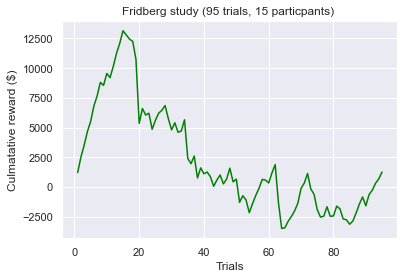

In [19]:
sns.set(style='darkgrid')
end_value, colour = cum_reward_95_mapped['trial_95'].iloc[0], 'red'
if end_value > 0:
    colour ='green'

fig = sns.lineplot(x=list(range(1, len(cum_reward_95_mapped.columns)+1)), y =cum_reward_95_mapped.iloc[0,:], color=colour)
plt.xlabel("Trials")
plt.ylabel("Culmatative reward ($)")
plt.title(f"{''.join(cum_reward_95_mapped.index.unique().to_list())} study (95 trials, 15 particpants) ")
plt.show(fig)

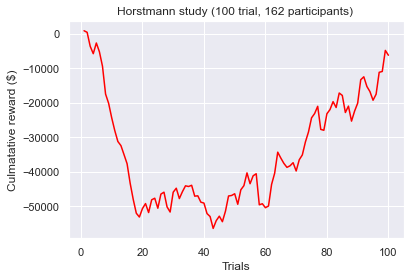

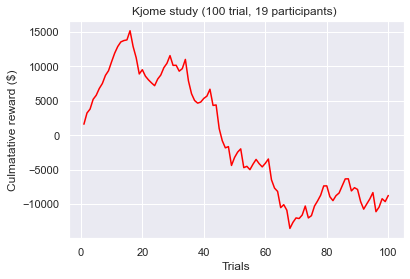

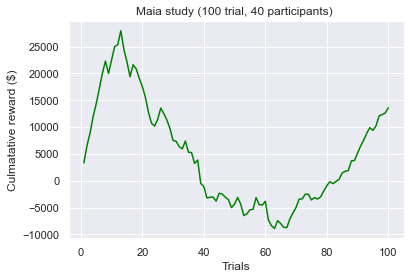

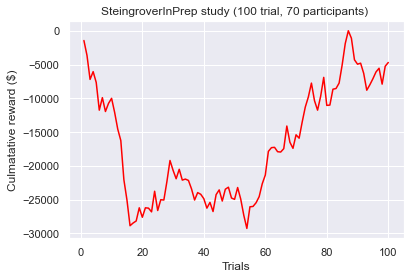

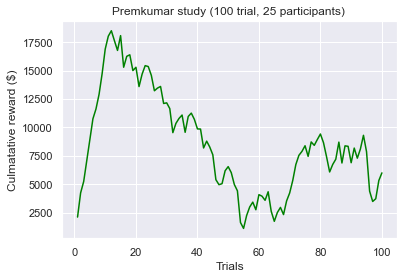

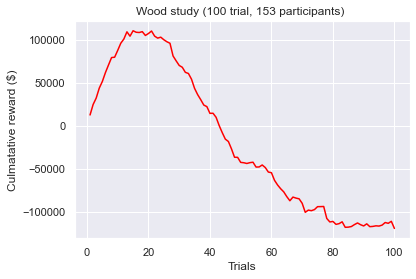

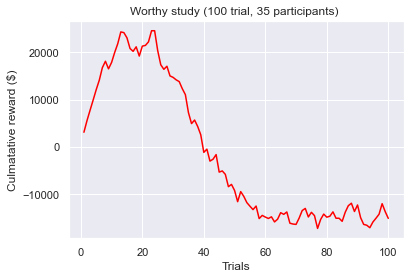

In [20]:
for study in cum_reward_100_mapped.index:
    end_value, colour = cum_reward_100_mapped['trial_100'].loc[study], 'red'
    if end_value > 0:
        colour ='green'
    fig = sns.lineplot(x=list(range(1, len(cum_reward_100_mapped.columns)+1)), y =cum_reward_100_mapped.loc[study].values.tolist(), color=colour)
    plt.xlabel("Trials")
    plt.ylabel("Culmatative reward ($)")
    plt.title(f"{''.join(study)} study (100 trial, {len(index_100[index_100['Study'] == study])} participants) ")
    plt.show()

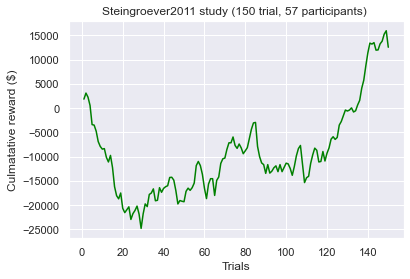

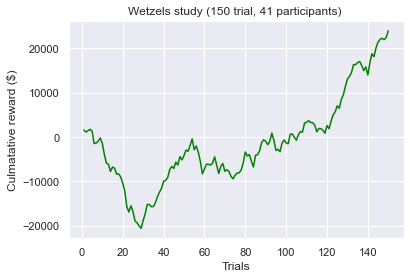

In [21]:
for study in cum_reward_150_mapped.index:
    end_value, colour = cum_reward_150_mapped['trial_150'].loc[study], 'red'
    if end_value > 0:
        colour ='green'
    fig = sns.lineplot(x=list(range(1, len(cum_reward_150_mapped.columns)+1)), y =cum_reward_150_mapped.loc[study].values.tolist(), color=colour)
    plt.xlabel("Trials")
    plt.ylabel("Culmatative reward ($)")
    plt.title(f"{''.join(study)} study (150 trial, {len(index_150[index_150['Study'] == study])} participants) ")
    plt.show(fig)

In [22]:
def plot(axrow, x, y):
    axrow[0].plot(x, color='red')
    axrow[1].plot(y, color='green')

nrows = 3
fig, axes = plt.subplots(nrows, 2)
for study in cum_reward_100_mapped.index:
    end_value, colour = cum_reward_100_mapped['trial_100'].loc[study], 'red'
    if end_value > 0:
        colour ='green'
    x=list(range(1, len(cum_reward_100_mapped.columns)+1)),
    y =cum_reward_100_mapped.loc[study].values.tolist(), color=colour)
    plot(row)

SyntaxError: unmatched ')' (Temp/ipykernel_16016/3977357598.py, line 12)

## Data Processing 


The performance of the participants on IGT may have been altered by factors that varied across the included studies (e.g. randomly shuffled payoff or
fixed payoff sequence) . To mitigate against these factors and allow for more accurate comparison, we restrict our investigation to a subset of the available data. This subset contains the 7 investigations that use the   